# C-D Nozzles

`pygasflow` comes with a nozzle subpackage, aimed to build and visuale different nozzle designs. 

At the time of writing, three different nozzles are implemented:
1. `CD_Conical_Nozzle`: the nozzle's divergent is conical. Support both planar and axisymmetric geometry.
2. `CD_TOP_Nozzle`: Thrust Optimized Parabolic, based on Rao's parabolic approximation. Support both planar and axisymmetric geometry.
3. `CD_Min_Length_Nozzle`: Minimum Length Nozzle built with the Method of Characteristics where the expansion takes place through a centered Prandtl-Meyer wave emanating from a sharp corner throat. Support only planar geometry. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygasflow.nozzles import (
    CD_Conical_Nozzle,
    CD_TOP_Nozzle,
    CD_Min_Length_Nozzle
)

Let's look at the help, for example about the `CD_Conical_Nozzle`:

In [2]:
CD_Conical_Nozzle?

Init signature:
CD_Conical_Nozzle(
    Ri=0.4,
    Re=1.2,
    Rt=0.2,
    Rj=0.1,
    R0=0.1,
    theta_c=40,
    theta_N=15,
    **params,
)
Docstring:     
    Convergent-Divergent nozzle with conical divergent.

    Examples
    --------

    Compute the length of a conical nozzle:

    >>> from pygasflow.nozzles import CD_Conical_Nozzle
    >>> Ri, Re, Rt = 0.4, 1.2, 0.2
    >>> nozzle = CD_Conical_Nozzle(Ri, Re, Rt, theta_c=30, theta_N=25)
    >>> nozzle.length
    np.float64(2.5666763867738522)

    Change the angle of the divergent section and retrieve the new length
    of the nozzle:

    >>> nozzle.theta_N = 60
    >>> nozzle.length
    np.float64(1.0350852961085883)

    Visualize the nozzle:

    .. bokeh-plot::
        :source-position: above

        from pygasflow.nozzles import CD_Conical_Nozzle
        Ri, Re, Rt = 0.4, 1.2, 0.2
        nozzle = CD_Conical_Nozzle(Ri, Re, Rt, theta_c=30, theta_N=25)
        nozzle.plot(interactive=False)

    
Parameters of 'CD_Conical

We can see that to construct a nozzle we need to use a bunch of radius for different sections and junctions.  
We can specify the geometry type (axisymmetric or planar), from which the nozzle will compute the areas. With axisymmetric geometry, the nozzle uses a circular cross section. With planar nozzle, the radius is defined as half height of the nozzle section.

## Axisymmetric nozzles

Axisymmetric nozzles use a circular cross section. Let's define the important parameters:

In [3]:
Ri = 0.4         # inlet radius of the convergent section
Rt = 0.2         # throat radius
Re = 1.2         # exit (outlet) radius of the divergent section
Rj = 0.1         # junction radius between the convergent and divergent at
                 # the throat section. Used in the conical nozzle.
R0 = 0.2         # junction radius between the combustion chamber and the convergent
theta_c = 40     # half cone angle of the convergent section
theta_N = 15     # half cone angle of the divergent section
# fractional lengths. Used to construct TOP nozzles.
K = [0.6, 0.7, 0.8, 0.9, 1]

Here I create a `nozzles` list for convenience. The different nozzles will be appended to this list. Note that I also specify the geometry type to be axisymmetric.

In [4]:
geom_type = "axisymmetric"
nozzles = []
nozzles.append(CD_Conical_Nozzle(Ri, Re, Rt, Rj, R0, theta_c=theta_c, theta_N=theta_N, geometry_type=geom_type))
for k in K:
    nozzles.append(CD_TOP_Nozzle(Ri, Rt, R0, theta_c, k, geometry_type=geom_type))

I can print the nozzle object to get a textual description. We can notice that the areas have been computed using the circular area formula. I can access the different values with the methods seen above.

In [5]:
print(nozzles[0])

C-D Conical Nozzle
Radius:
	Ri	0.4
	Re	1.2
	Rt	0.2
Areas:
	Ai	0.5026548245743669
	Ae	4.523893421169302
	At	0.12566370614359174
Lengths:
	Lc	0.3475417887987027
	Ld	3.7452160573276165
	L	4.092757846126319
Angles:
	theta_c	40
	theta_N	15



Here I plot the different nozzles for comparison.

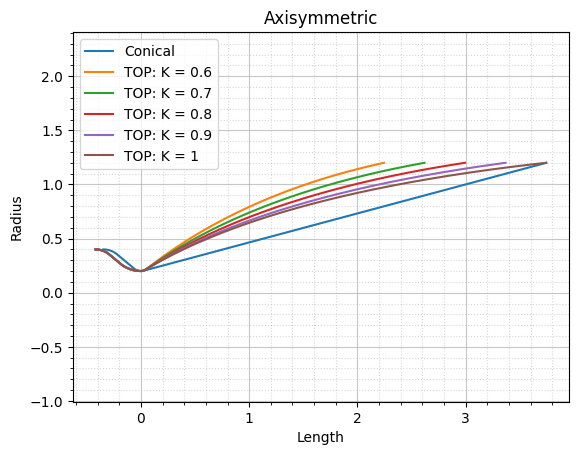

In [6]:
plt.figure()

for i, g in enumerate(nozzles):
    lbl = "Conical"
    if i != 0:
        lbl = "TOP: K = {}".format(K[i-1])
    x, y = g.build_geometry()
    plt.plot(x, y, label=lbl)
plt.legend()
plt.xlabel("Length")
plt.ylabel("Radius")
plt.title("Axisymmetric")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', alpha=0.7)
plt.grid(which='minor', linestyle=':', alpha=0.5)
plt.axis('equal')
plt.show()

The difference in the convergent's length between conical and TOP nozzles is due to the different throat junction radius. Rao's TOP nozzle uses a prescribed radius, whereas in the conical nozzle we can specify the radius we'd like.

From this picture we can also appreciate the Fractional Length of the nozzle with respect to a same exit area ratio conical nozzle with 15 deg half-cone angle.

## Planar Nozzles

With planar nozzles the width is constant along the length of the nozzle. In this case, the radius corresponds to half height of the cross section (the distance from the line of symmetry of the planar nozzle, to the wall).

In [7]:
geom_type = "planar"

conical = CD_Conical_Nozzle(Ri, Re, Rt, Rj, R0, theta_c=theta_c, theta_N=theta_N, geometry_type=geom_type)

# fractional length of the TOP nozzle
K = 0.7
top = CD_TOP_Nozzle(Ri, Rt, R0, theta_c, 0.7, geometry_type=geom_type)
print(top)

C-D TOP Nozzle
Radius:
	Ri	0.4
	Re	1.2000000000000002
	Rt	0.2
Areas:
	Ai	0.8
	Ae	2.4000000000000004
	At	0.4
Lengths:
	Lc	0.4203358356519432
	Ld	2.619476340869189
	L	3.0398121765211323
Angles:
	theta_c	40
	theta_N	29.526881404482012
	theta_e	14.248957413040683



For the `CD_Min_Length_Nozzle` we also need to specify the specific heats ratio of the gas and the number of characteristics lines to use.

In [8]:
# number of characteristics
n = 15
# specific heats ratio
gamma = 1.4

moc = CD_Min_Length_Nozzle(Ri, Re, Rt, Rj, R0, theta_c, n, gamma)

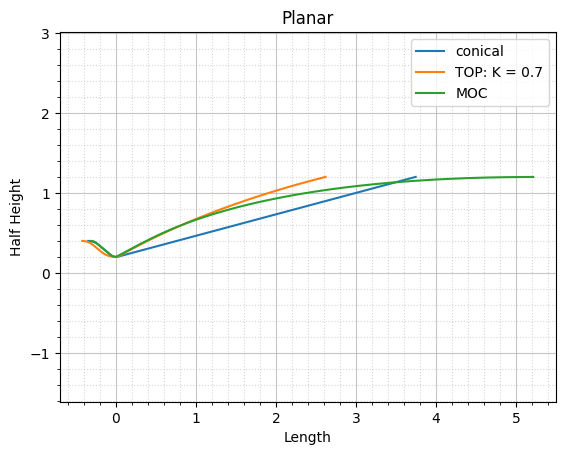

In [9]:
x1, y1 = conical.build_geometry()
x2, y2 = top.build_geometry()
x3, y3 = moc.build_geometry()
plt.figure()
plt.plot(x1, y1, label="conical")
plt.plot(x2, y2, label="TOP: K = {}".format(top.fractional_length))
plt.plot(x3, y3, label="MOC")
plt.legend()
plt.xlabel("Length")
plt.ylabel("Half Height")
plt.title("Planar")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', alpha=0.7)
plt.grid(which='minor', linestyle=':', alpha=0.5)
plt.axis('equal')
plt.show()